# Lab Activity 5: Introduction to neural nets

The goal of this activity is explore how neural nets are used, relying on the fairly simple resources available through `sklearn`. At the point the plan is for you to use the more advanced neural net implementations in the `tensorflow` library in a later lab and implement certain algorithms yourself in a future project.

This activity is adapted from M&uuml;ller and Guido, *Introduction to Machine Learning with Python*, pg 106-118. 
As in certain previous labs, the code is drawn from what is available from the GitHub
repositories supporting 
[the M&uuml;ller and Guido book](https://github.com/amueller/mglearn/tree/master/mglearn).

## 1. Some data

We start by grabbing some toy data which we'll use for a classification problem. In this case we'll use artificial data that doesn't have any particular real-world meaning. The `sklearn` library has a function to generate data with two attributes plus a discrete target such that the plot of the data points makes two interlocking semicircles or "moons". The point is that this makes a difficult classification problem since the data points are very much not linearly separable.

Let's generate some data and see what it looks like.

In [1]:
from sklearn.datasets import make_moons
import mglearn
import matplotlib.pyplot as plt

X,y = make_moons(n_samples=100, noise=0.25, random_state=3)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0,0.5,'Feature 1')

Now separate let's separate this in to training and test sets

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=42)

Then let's view the resulting training and test data separately.

Text(0,0.5,'Feature 1')

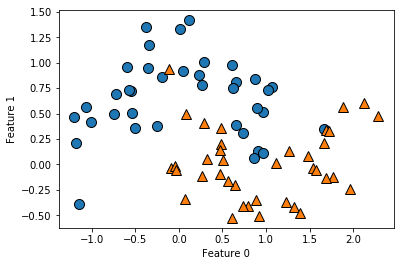

In [3]:
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0,0.5,'Feature 1')

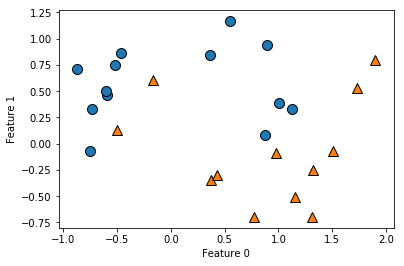

In [4]:
mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

## 2. For comparison: KNN

How well does KNN do on this problem? Train a KNN classifier and find its accuracy. Refer back to Lab 1 (parts 8 and 9) as necessary to refersh your memory on how the library works.

In [5]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print("Test set score: {:.2f}".format(np.mean(y_pred != y_test)))

Test set score: 0.12


## 3. Training a neural net

Now let's see how a multi-layer perceptron classifier from `sklearn` does when used with the default settings.

In [6]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=0).fit(X_train, y_train)

/usr/lib64/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Okay, we get a `ConvergenceWarning`, but let's live with it for now. We can plot the classifier to see how it separates the plane. In this plot we show the training points again, but color two regions in the plane where the classifier would find new data points to be in one class or the other.

Text(0,0.5,'Feature 1')

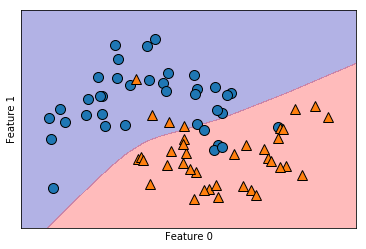

In [7]:
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

That doesn't look very promising. Let's see how badly it does on the training data:

In [8]:
print("Test set score: {:.2f}".format(mlp.score(X_test, y_test)))

Test set score: 0.80


How does that compare with KNN? 


## 4. Adjusting parameters

Now let's take a look at the parameters 
[as documented in the API](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)
Notice that the default *solver* (that is, training algorithm)
is something called `adam`
(introduced in [this paper](https://arxiv.org/abs/1412.6980))
which the documentation says "works pretty well on relatively large datasets'.
Our dataset is small.

The other parameter to take note of immeidately is 
`hidden_layer_sizes`. This is a tuple whose length is the number
of layers of hidden units, with each component
indicating the number of units in the respective layers.
Apparently the default is one layer with 100 units, which
also seems tuned to large data sets.
Let's see what happens when we adjust both of those.

The documentation says that the `lbfgs` solver 
"can converge faster and perform better" on smaller data sets.
(That's the *limited-memory Broyden-Fletcher-Goldfarb-Shanno* solver.)
Let's try that one, and also reduce the number of
hidden units to 10.

Test set score: 0.88


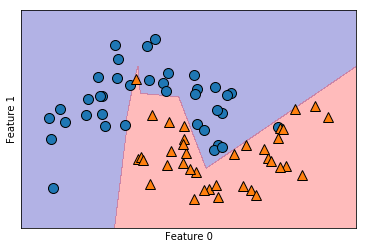

In [9]:
mlp = MLPClassifier(solver='lbfgs', random_state=0,hidden_layer_sizes=[10]).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
print("Test set score: {:.2f}".format(mlp.score(X_test, y_test)))

Another variable we can fiddle with is the activation function. Notice (again, from the `MLPClassifier` documentation) that the default activation function is something called `relu`, which refers to the *rectified linear unit function*, also known simply as the *rectifier*. 
(Shout out to Seth Randall who asked me about relu after class on Friday. It turns out 
M&uuml;ller and Guido talk about it.) This function returns 0 for any input less than or
equal to 0, but acts as the identity for positive input.
Compare it to the hyperbolic tangent and the "adjusted" logistic sigmoid:

Text(0,0.5,'relu(x), sigmoid(x), tanh(x)')

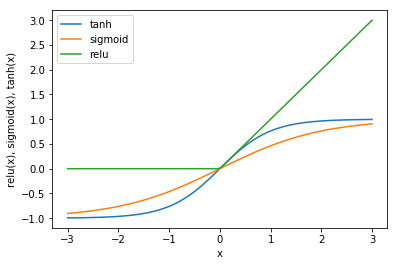

In [10]:
import numpy as np

# applies the function "element-wise" to an array-like input
def sigmoid_adjusted(x) :
    return [2 / (1 + np.exp(-x_i)) -1 for x_i in x] 

line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, sigmoid_adjusted(line), label="sigmoid")
plt.plot(line, np.maximum(line, 0), label="relu")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), sigmoid(x), tanh(x)")

I'm still figuring out what the advantages and disadvantages are of the various choices
for activation, but one thing it's straighforward to see is that tanh or sigmoid will give a smoother boundary between regions:

Test set score: 0.88


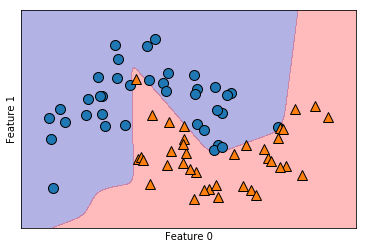

In [11]:
mlp = MLPClassifier(solver='lbfgs', random_state=0,hidden_layer_sizes=[10], activation='tanh').fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
print("Test set score: {:.2f}".format(mlp.score(X_test, y_test)))

Experiment for yourself for a while. Although there is a long list of parameters available to `MLPClassifier`, I recommend sticking with the ones we've talked about so far and also the parameter `alpha`, which controls the regularization penalty. For `hidden_layer_sizes`, you can try adding extra layers. But don't adjust several parameters haphazardly in the same experiment. Pick one thing at a time to vary (solver, number of hidden units, number of layers, alpha value) so you can isolate the effect. 

2  Test set score: 0.72
3  Test set score: 0.80
4  Test set score: 0.88
5  Test set score: 0.92
6  Test set score: 0.92
7  Test set score: 0.84
8  Test set score: 0.84
9  Test set score: 0.88
10  Test set score: 0.88
11  Test set score: 0.84
12  Test set score: 0.88
13  Test set score: 0.84
14  Test set score: 0.92
15  Test set score: 0.88
16  Test set score: 0.92
17  Test set score: 0.96
18  Test set score: 0.88
19  Test set score: 0.92
20  Test set score: 0.92
21  Test set score: 0.88


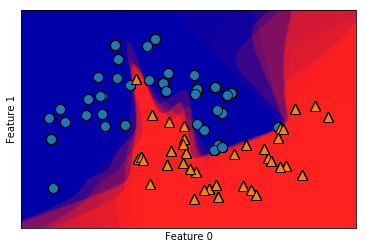

In [12]:
myAlpha = .3
mySolver = 'lbfgs'
for x in range(20):
    mlp = MLPClassifier(solver=mySolver, random_state=0,hidden_layer_sizes=[x+2], activation='tanh').fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=myAlpha)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
    plt.xlabel("Feature 0")
    plt.ylabel("Feature 1")
    print(x+2," Test set score: {:.2f}".format(mlp.score(X_test, y_test)))

After you have done your own experiment, consider this one that M&uuml;ller and Guido do. Using the `lbfgs` solver, two layers of hidden units, and varying among 10 vs 100 units per layer and various values for alpha:

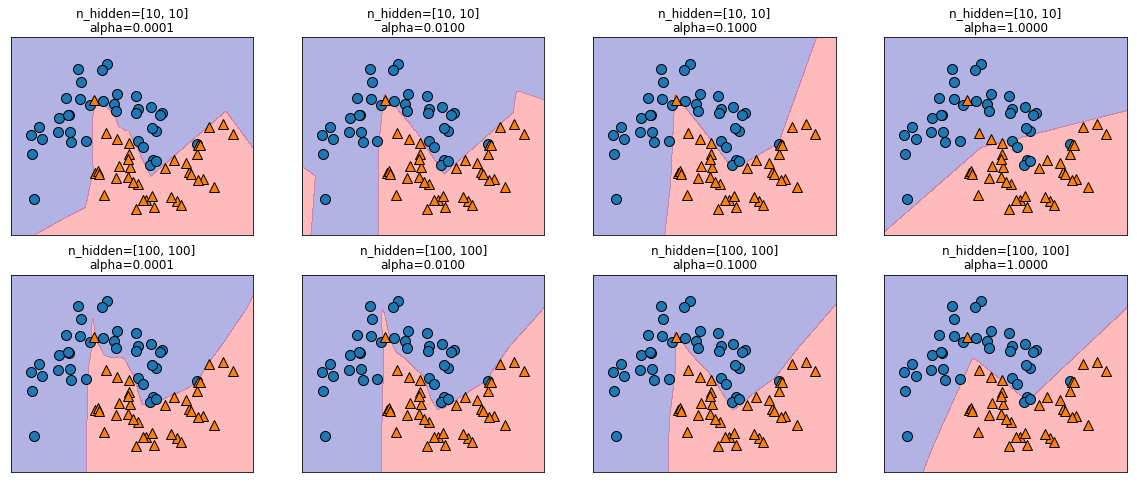

In [13]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0,
                            hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
                            alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(
                      n_hidden_nodes, n_hidden_nodes, alpha))

We also can consider the affect of the initial weights of the parameters. These are generated pseudo-randomly, but with a random process started by the random seed given by the parameter `random_state`. Since we're always giving the same seed, we'll get the same results in the preceding code we run it again. But what if we hold other parameters constant and adjust the seed?

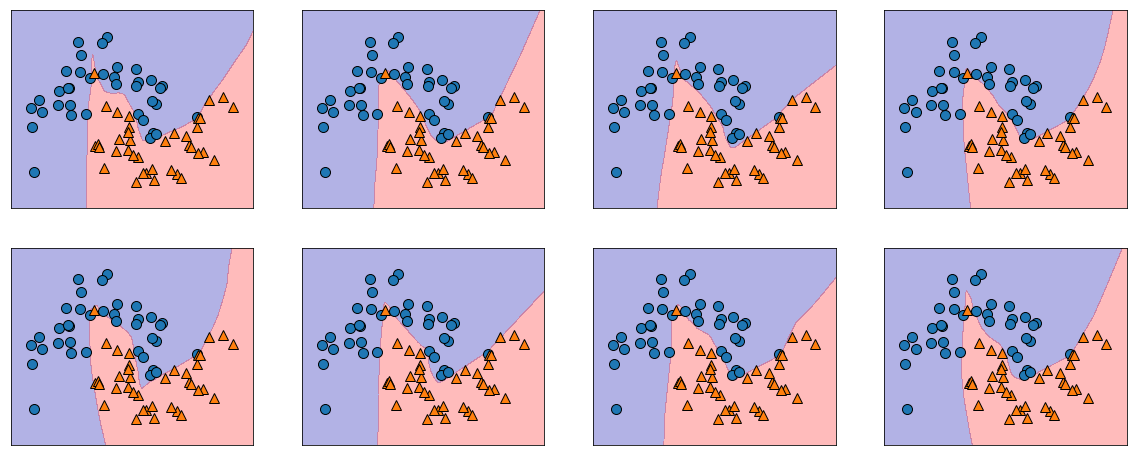

In [14]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=i,
                        hidden_layer_sizes=[100, 100])
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)

## 5. Real-world data: the Breast Cancer data set

Let's see how MLP does on real-world data. One data set included with `scikit-learn` is a collection of measurements of breast tumors classified as benign or malignant. 

In [15]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In the data set's description, note that the various measurements have very different ranges. Now let's see how an MLP classifier does on this data, starting with the default parameters.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.94
Accuracy on test set: 0.92


That doesn't seem so bad, but it's well worth asking whether we can do better. 
One factor, besides algorithm parameters, that affects performance is the fact, noted above, the input features vary in different ways. 
We can adjust them so that they all have mean 0 and standard deviation 1 by taking each reading and subtracting the mean of that attribute from it and then dividing by that attribute's standard deviation.

In [17]:
# compute the mean value per feature on the training set
mean_on_train = X_train.mean(axis=0)
# compute the standard deviation of each feature on the training set
std_on_train = X_train.std(axis=0)

# subtract the mean, and scale by inverse standard deviation
# afterward, mean=0 and std=1
X_train_scaled = (X_train - mean_on_train) / std_on_train
# use THE SAME transformation (using training mean and std) on the test set
X_test_scaled = (X_test - mean_on_train) / std_on_train


Since this data set is larger, we'll use the default `adam` solver, but increase the
maximum number of iterations (remembering the `ConvergenceWarning` we got last time we used it.

In [18]:
mlp = MLPClassifier(max_iter=1000, random_state=8)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.965


Can you do any better by adjusting other parameters?

## 6. Visualizing an MLP

The following is a "color bar" chart that shows the weights for each input feature for each hidden unit (100, in one layer) in the classifier we just trained. 

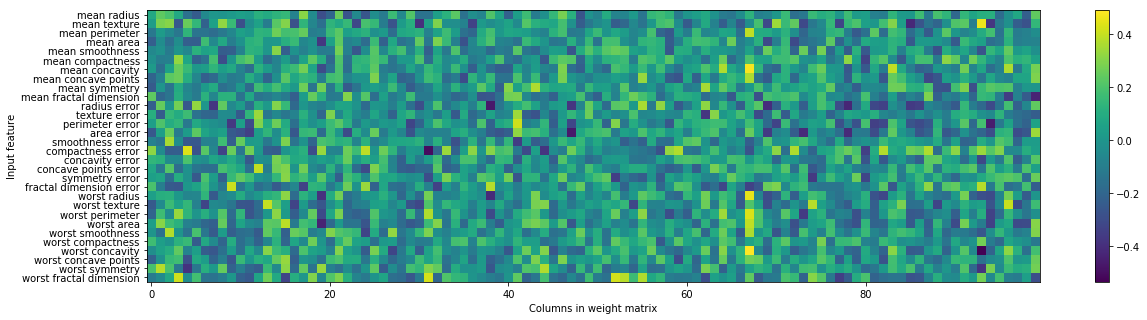

In [20]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0],aspect='auto',alpha=1,interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()

See if you can infer anything from this. After discussing with your partner, you can borrow the M&uuml;ller and Guido to see their explanation